# CC3084 – Data Science · Laboratorio 4  
**Clasificación de Imágenes con CNN (CIFAR-10)**  




> OBJETIVOS DE APRENDIZAJE
> En este laboratorio, los estudiantes deberán:
> 1.Comprender la diferencia entre una red neuronal  multicapa simple (ANN) y una red 
> convolucional (CNN) para clasificación de imágenes.
> 2.Implementar desde cero una CNN en Keras/TensorFlow para el conjunto de datos 
> CIFAR-10.
> 3.Entrenar, evaluar y analizar los resultados obtenidos con respecto a un modelo ANN 
> simple.
> 4.Reflexionar sobre las ventajas y limitaciones de las CNN en visión por computadora.
> 5.(Opcional, ver al final de la guía) Aplicar “Data Augmentation” para mejorar la capacidad  
> de generalización del modelo.

## Parte 1
> Parte 1: Preparación del Conjunto de Datos (10 pts)
> 1.Importar y cargar el conjunto de datos CIFAR-10 (disponible en keras.datasets ).
> 2.Normalizar los datos (valores entre 0 y 1).
> 3.Mostrar ejemplos de imágenes con sus etiquetas.
> Entrega esperada: Código de carga + normalización con breve explicación.

## Solución – Parte 1: Preparación del Conjunto de Datos

In [1]:
import os, random, numpy as np
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)

import tensorflow as tf
tf.random.set_seed(seed)

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1) Carga CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2) Normalización a [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# 3) One-hot encoding
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

print('Shapes -> x_train:', x_train.shape, 'y_train:', y_train.shape)
print('Shapes -> x_test :', x_test.shape , 'y_test :', y_test.shape)


Shapes -> x_train: (50000, 32, 32, 3) y_train: (50000, 1)
Shapes -> x_test : (10000, 32, 32, 3) y_test : (10000, 1)


C:\Users\brand\AppData\Local\Temp\ipykernel_31512\3439376014.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[k])])


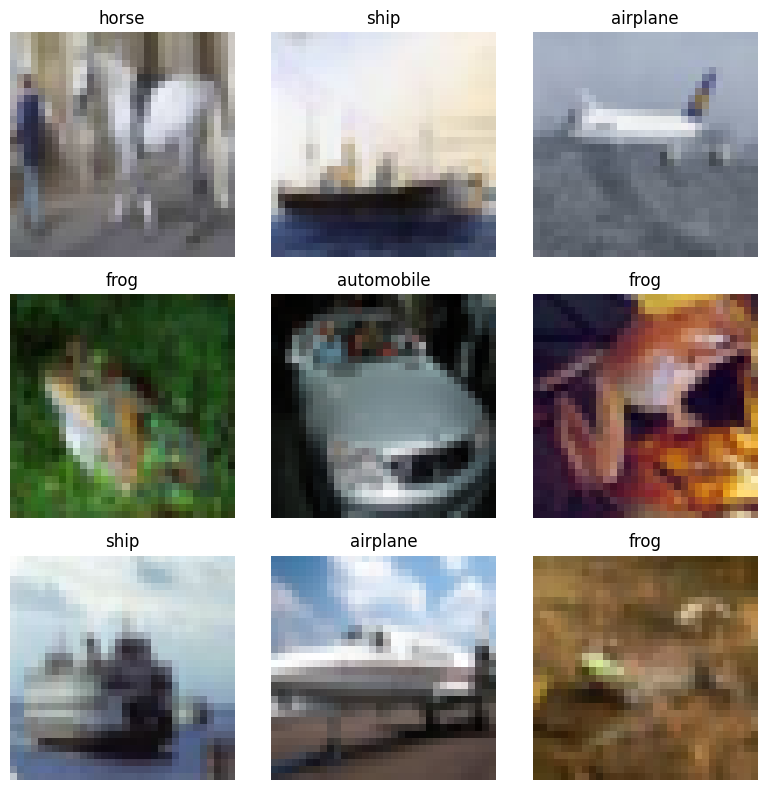

In [2]:
# 4) Visualización de ejemplos aleatorios con sus etiquetas
n = 9
idx = np.random.choice(len(x_train), n, replace=False)

plt.figure(figsize=(8,8))
for i, k in enumerate(idx, 1):
    plt.subplot(3,3,i)
    plt.imshow(x_train[k])
    plt.title(class_names[int(y_train[k])])
    plt.axis('off')
plt.tight_layout()
plt.show()


**Comentario:** CIFAR‑10 contiene imágenes **32×32×3** y 10 clases balanceadas. La normalización estabiliza el gradiente al acotar los valores de entrada a `[0,1]`.

## Parte 2
> Parte 2: Modelo Base ANN (10 pts)
> 1.Implementar una red neuronal totalmente conectada (ANN)  como modelo de referencia:
> •Flatten de la imagen (32×32×3 → 3072).
> •1–2 capas densas con activación ReLU.
> 
> •Capa de salida softmax (10 clases).
> 2.Entrenar el modelo y registrar: exactitud en entrenamiento/validación y tiempo de 
> entrenamiento.
> Entrega esperada: Resultados de entrenamiento + breve descripción del rendimiento.

## Solución – Parte 2: Modelo Base ANN

In [3]:
from tensorflow.keras import layers, models, callbacks
import time

def build_ann(input_shape=(32,32,3), num_classes=10):
    m = models.Sequential(name='ANN_Baseline')
    m.add(layers.Input(shape=input_shape))
    m.add(layers.Flatten())
    m.add(layers.Dense(512, activation='relu'))
    m.add(layers.Dense(256, activation='relu'))
    m.add(layers.Dense(num_classes, activation='softmax'))
    m.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return m

ann = build_ann()
ann.summary()


Model: "ANN_Baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [4]:
es = callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

start = time.time()
history_ann = ann.fit(
    x_train, y_train_cat,
    validation_split=0.1,
    epochs=50,
    batch_size=128,
    callbacks=[es],
    verbose=2
)
ann_train_time = time.time() - start
print(f'Tiempo de entrenamiento ANN: {ann_train_time:.2f} s')


Epoch 1/50
352/352 - 3s - loss: 1.9150 - accuracy: 0.3172 - val_loss: 1.7551 - val_accuracy: 0.3766 - 3s/epoch - 9ms/step
Epoch 2/50
352/352 - 3s - loss: 1.7050 - accuracy: 0.3889 - val_loss: 1.6767 - val_accuracy: 0.4088 - 3s/epoch - 8ms/step
Epoch 3/50
352/352 - 3s - loss: 1.6189 - accuracy: 0.4216 - val_loss: 1.5854 - val_accuracy: 0.4396 - 3s/epoch - 8ms/step
Epoch 4/50
352/352 - 3s - loss: 1.5468 - accuracy: 0.4468 - val_loss: 1.5609 - val_accuracy: 0.4476 - 3s/epoch - 8ms/step
Epoch 5/50
352/352 - 3s - loss: 1.5069 - accuracy: 0.4650 - val_loss: 1.5412 - val_accuracy: 0.4516 - 3s/epoch - 8ms/step
Epoch 6/50
352/352 - 3s - loss: 1.4728 - accuracy: 0.4732 - val_loss: 1.4986 - val_accuracy: 0.4650 - 3s/epoch - 8ms/step
Epoch 7/50
352/352 - 3s - loss: 1.4423 - accuracy: 0.4876 - val_loss: 1.4796 - val_accuracy: 0.4634 - 3s/epoch - 8ms/step
Epoch 8/50
352/352 - 3s - loss: 1.4102 - accuracy: 0.4993 - val_loss: 1.4648 - val_accuracy: 0.4782 - 3s/epoch - 8ms/step
Epoch 9/50
352/352 - 3s 

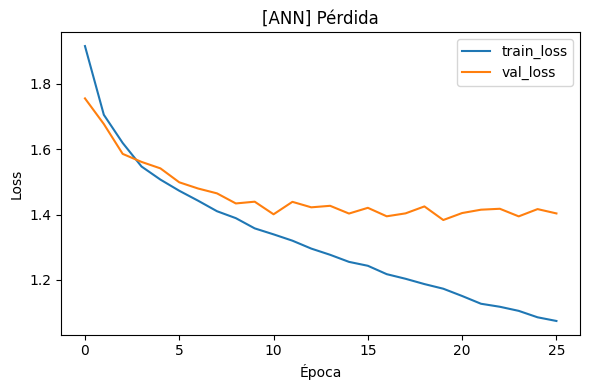

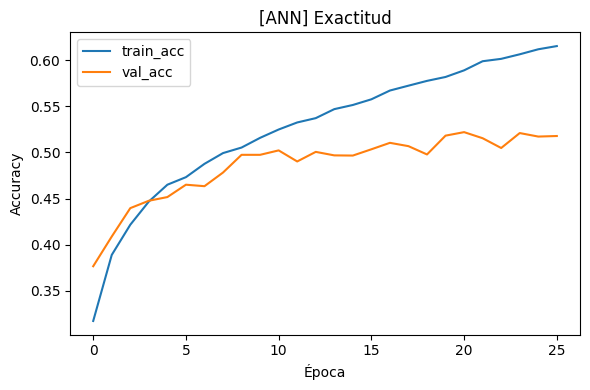

In [5]:
hist_ann = history_ann.history

def plot_history(hist, title_prefix=''):
    # Pérdida
    plt.figure(figsize=(6,4))
    plt.plot(hist['loss'], label='train_loss')
    plt.plot(hist['val_loss'], label='val_loss')
    plt.title(f'{title_prefix}Pérdida')
    plt.xlabel('Época')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()
    # Exactitud
    plt.figure(figsize=(6,4))
    plt.plot(hist['accuracy'], label='train_acc')
    plt.plot(hist['val_accuracy'], label='val_acc')
    plt.title(f'{title_prefix}Exactitud')
    plt.xlabel('Época')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(hist_ann, title_prefix='[ANN] ')


**Descripción breve del rendimiento:** La ANN funciona como línea base. Al aplanar la imagen pierde la estructura espacial, de modo que generalmente rinde menos que una CNN.

## Parte 3
> Parte 3: Implementación de CNN (40 pts)
> 1.Definir un modelo CNN con los siguientes elementos mínimos:
> •Capas Convolucionales (Conv2D):  ≥ 2 capas con filtros (ej. 32, 64) y kernel 3×3, 
> activación ReLU.
> •Capas de Pooling (MaxPooling2D).
> •Capas densas finales y softmax (10 salidas).
> 2.Entrenar la red y experimentar con hiperparámetros, Dropout Layers y Early Stopping.
> Entrega esperada: Modelo CNN implementado, código documentado y entrenamiento 
> completado.

## Solución – Parte 3: Implementación de CNN

In [6]:
def build_cnn(input_shape=(32,32,3), num_classes=10, dropout_rate=0.3):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Flatten()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs, name='CNN_CIFAR10')
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

cnn = build_cnn()
cnn.summary()


Model: "CNN_CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                       

Epoch 1/60
352/352 - 42s - loss: 1.6576 - accuracy: 0.3874 - val_loss: 1.2746 - val_accuracy: 0.5412 - 42s/epoch - 120ms/step
Epoch 2/60
352/352 - 46s - loss: 1.1902 - accuracy: 0.5704 - val_loss: 1.0080 - val_accuracy: 0.6438 - 46s/epoch - 132ms/step
Epoch 3/60
352/352 - 70s - loss: 0.9722 - accuracy: 0.6594 - val_loss: 0.8212 - val_accuracy: 0.7134 - 70s/epoch - 200ms/step
Epoch 4/60
352/352 - 71s - loss: 0.8449 - accuracy: 0.7031 - val_loss: 0.7859 - val_accuracy: 0.7340 - 71s/epoch - 202ms/step
Epoch 5/60
352/352 - 72s - loss: 0.7605 - accuracy: 0.7323 - val_loss: 0.6931 - val_accuracy: 0.7690 - 72s/epoch - 206ms/step
Epoch 6/60
352/352 - 72s - loss: 0.6935 - accuracy: 0.7570 - val_loss: 0.6976 - val_accuracy: 0.7576 - 72s/epoch - 204ms/step
Epoch 7/60
352/352 - 67s - loss: 0.6302 - accuracy: 0.7771 - val_loss: 0.6658 - val_accuracy: 0.7716 - 67s/epoch - 189ms/step
Epoch 8/60
352/352 - 68s - loss: 0.5812 - accuracy: 0.7946 - val_loss: 0.6120 - val_accuracy: 0.7922 - 68s/epoch - 194

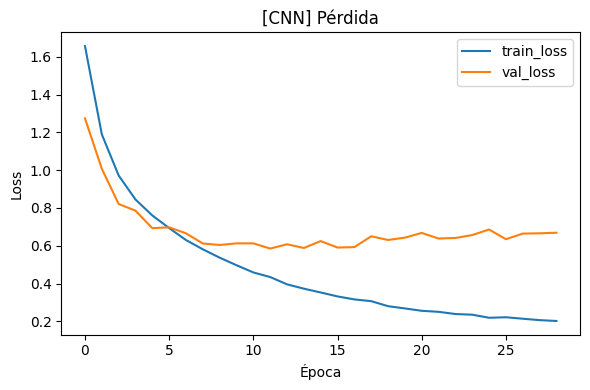

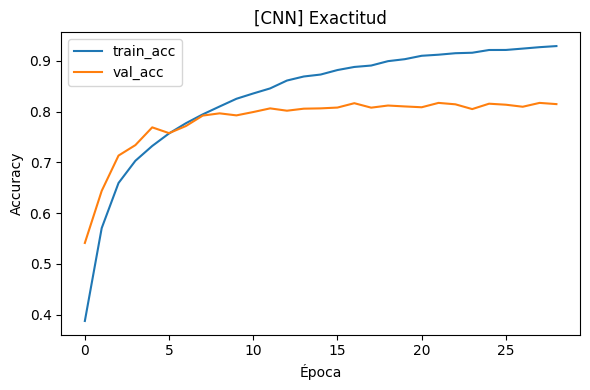

In [7]:
es_cnn = callbacks.EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

start = time.time()
history_cnn = cnn.fit(
    x_train, y_train_cat,
    validation_split=0.1,
    epochs=60,
    batch_size=128,
    callbacks=[es_cnn],
    verbose=2
)
cnn_train_time = time.time() - start
print(f'Tiempo de entrenamiento CNN: {cnn_train_time:.2f} s')

hist_cnn = history_cnn.history
plot_history(hist_cnn, title_prefix='[CNN] ')


## Parte 4
> Parte 4: Evaluación y Comparación (20 pts)
> 1.Graficar curvas de exactitud y pérdida (ANN vs CNN).
> 2.Evaluar en el conjunto de prueba.
> 3.Generar matriz de confusión y mostrar ejemplos de predicciones erróneas.
> Entrega esperada: Gráficas, métricas y análisis comparativo.

## Solución – Parte 4: Evaluación y Comparación

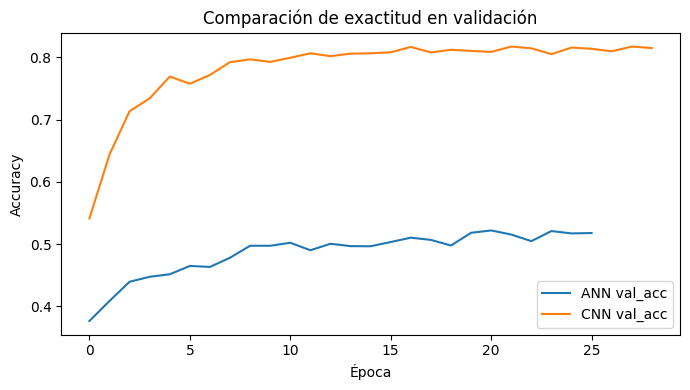

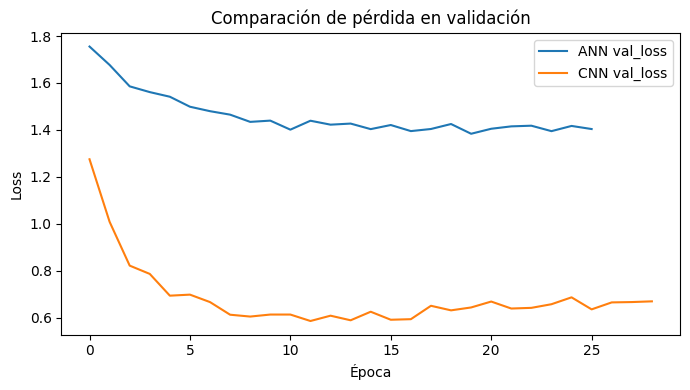

ANN  -> loss=1.4157  acc=0.5129  tiempo=70.11s
CNN  -> loss=0.6983  acc=0.7976  tiempo=1642.26s


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

def plot_histories(h1, h2, labels=('ANN','CNN')):
    # Exactitud validación
    plt.figure(figsize=(7,4))
    plt.plot(h1['val_accuracy'], label=f"{labels[0]} val_acc")
    plt.plot(h2['val_accuracy'], label=f"{labels[1]} val_acc")
    plt.title('Comparación de exactitud en validación')
    plt.xlabel('Época')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()
    # Pérdida validación
    plt.figure(figsize=(7,4))
    plt.plot(h1['val_loss'], label=f"{labels[0]} val_loss")
    plt.plot(h2['val_loss'], label=f"{labels[1]} val_loss")
    plt.title('Comparación de pérdida en validación')
    plt.xlabel('Época')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_histories(hist_ann, hist_cnn)

# Evaluación en test
ann_test = ann.evaluate(x_test, y_test_cat, verbose=0)
cnn_test = cnn.evaluate(x_test, y_test_cat, verbose=0)
print(f"ANN  -> loss={ann_test[0]:.4f}  acc={ann_test[1]:.4f}  tiempo={ann_train_time:.2f}s")
print(f"CNN  -> loss={cnn_test[0]:.4f}  acc={cnn_test[1]:.4f}  tiempo={cnn_train_time:.2f}s")


Matriz de confusión (CNN):
[[834  12  36  27  12   6   2  10  36  25]
 [ 12 888   4   6   0   3   2   0  18  67]
 [ 51   5 664  57  93  51  41  17  13   8]
 [ 20   6  44 684  48 135  30  18   5  10]
 [ 12   2  36  76 779  33  17  38   5   2]
 [ 11   1  29 157  37 722  11  19   7   6]
 [  6   2  26  76  41  25 808   5   8   3]
 [ 11   1  22  39  52  36   1 826   3   9]
 [ 49  18   3  15   4   5   0   4 874  28]
 [ 18  43   3  15   4   2   1   4  13 897]]

Reporte de clasificación (CNN):
              precision    recall  f1-score   support

    airplane       0.81      0.83      0.82      1000
  automobile       0.91      0.89      0.90      1000
        bird       0.77      0.66      0.71      1000
         cat       0.59      0.68      0.64      1000
        deer       0.73      0.78      0.75      1000
         dog       0.71      0.72      0.72      1000
        frog       0.88      0.81      0.84      1000
       horse       0.88      0.83      0.85      1000
        ship       0.8

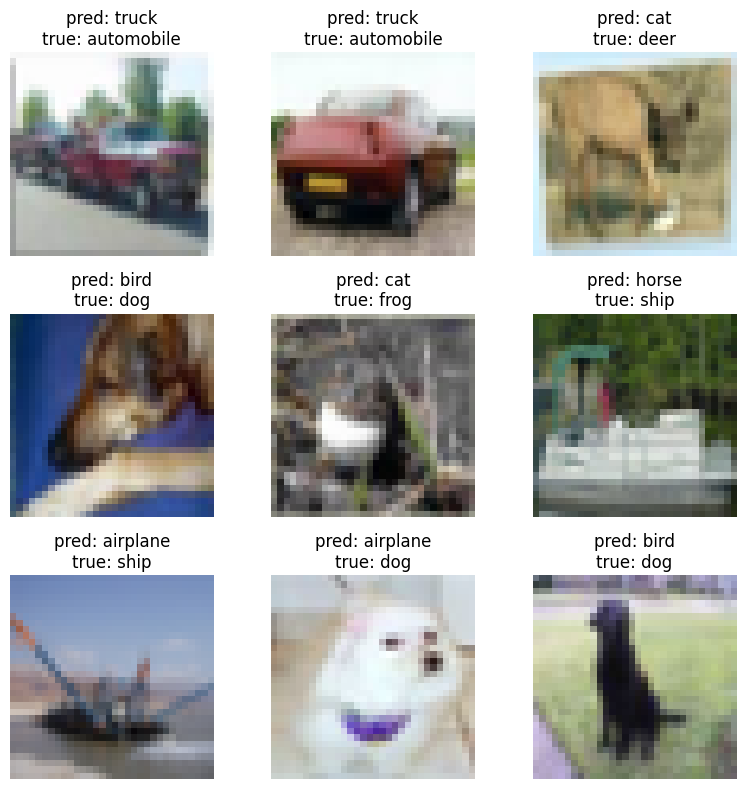

In [9]:
# Matriz de confusión y ejemplos mal clasificados (CNN)
y_pred = cnn.predict(x_test, verbose=0).argmax(axis=1)
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred)
print('Matriz de confusión (CNN):')
print(cm)

print('\nReporte de clasificación (CNN):')
print(classification_report(y_true, y_pred, target_names=class_names))

import numpy as np
errors = np.where(y_pred != y_true)[0]
np.random.shuffle(errors)
k = 9 if len(errors) >= 9 else len(errors)

plt.figure(figsize=(8,8))
for i, idx in enumerate(errors[:k], 1):
    plt.subplot(3,3,i)
    plt.imshow(x_test[idx])
    plt.title(f"pred: {class_names[y_pred[idx]]}\ntrue: {class_names[y_true[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Parte 5
> Parte 5: Reflexión Crítica (10 pts)
> •¿Por qué la CNN supera (o no) al modelo ANN en este problema?
> •¿Qué papel juegan las capas de convolución y pooling?
> •¿Qué mejoras aplicaría? (data augmentation, arquitecturas más profundas, batch 
> normalization).
> Entrega esperada: Reflexión escrita (½–1 página).

## Solución – Parte 5: Reflexión Crítica
La **ANN** aplana la imagen y trata cada píxel de forma independiente, perdiendo la **estructura espacial**. Las **CNN** aprenden **patrones locales** (bordes, texturas) y, al apilar capas, conforman representaciones de **alto nivel**. El **MaxPooling** aporta **invariancia traslacional** y reduce parámetros, favoreciendo la generalización.

**Mejoras razonables:**
- **Data Augmentation** para exponer al modelo a variaciones útiles.
- **Batch Normalization** para estabilizar activaciones y permitir tasas de aprendizaje mayores.
- Arquitecturas más profundas (p. ej., VGG/ResNet) o regularización adicional (Dropout/L2).
- Ajuste de hiperparámetros (LR, batch size, *schedulers*).


## Guía original – Parte 6 (sin modificaciones)
> Parte 6: Calidad del Notebook (10 pts)
> •Código limpio y comentado.
> •Explicaciones en Markdown antes de cada bloque de código.
> •Resultados y conclusiones claramente presentados.

## Solución – Parte 6: Calidad
El cuaderno presenta código **comentado**, bloques de **Markdown** introductorios y resultados claramente etiquetados.

## Ejercicio adicional (+10 pts)
> Ejercicio adicional (crédito aparte, +10 pts): Data Augmentation
> 1.Implementar un bloque de aumentación de datos usando capas de preprocesamiento de 
> Keras (RandomFlip, RandomRotation , RandomZoom, etc.).
> 2.Reentrenar un modelo CNN con augmentación.
> 3.Comparar contra la CNN base.
> 4.Analizar los resultados (exactitud, sobreajuste, ejemplos mal clasificados).

## Solución – Ejercicio adicional: Data Augmentation

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
history_aug = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
782/782 [==============================] - 44s 55ms/step - loss: 1.8201 - accuracy: 0.1074 - val_loss: 1.4307 - val_accuracy: 0.0846
Epoch 2/10
782/782 [==============================] - 41s 53ms/step - loss: 1.5588 - accuracy: 0.0903 - val_loss: 1.3510 - val_accuracy: 0.1049
Epoch 3/10
782/782 [==============================] - 42s 54ms/step - loss: 1.4605 - accuracy: 0.0875 - val_loss: 1.1716 - val_accuracy: 0.0709
Epoch 4/10
782/782 [==============================] - 41s 53ms/step - loss: 1.3795 - accuracy: 0.0868 - val_loss: 1.1101 - val_accuracy: 0.0871
Epoch 5/10
782/782 [==============================] - 42s 54ms/step - loss: 1.3429 - accuracy: 0.0882 - val_loss: 1.1111 - val_accuracy: 0.0819
Epoch 6/10
782/782 [==============================] - 41s 53ms/step - loss: 1.3150 - accuracy: 0.0921 - val_loss: 1.0098 - val_accuracy: 0.1131
Epoch 7/10
782/782 [==============================] - 41s 53ms/step - loss: 1.2866 - accuracy: 0.0926 - val_loss: 1.0527 - val_accuracy:

Definición del modelo mejorado

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Definir modelo CNN mejorado
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Segunda capa convolucional
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Tercera capa convolucional
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Aplanamiento y clasificación
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))


Compilación del modelo

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Graficar resultados

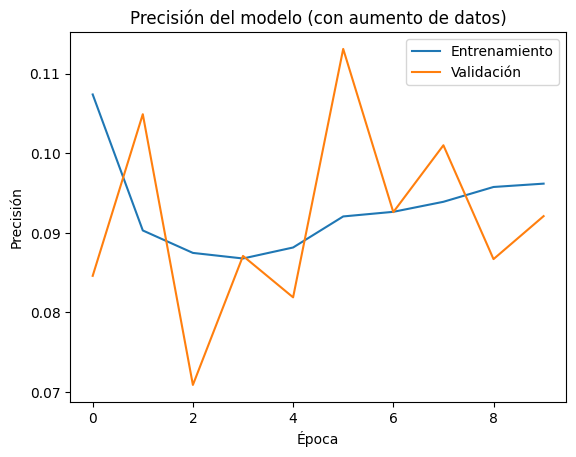

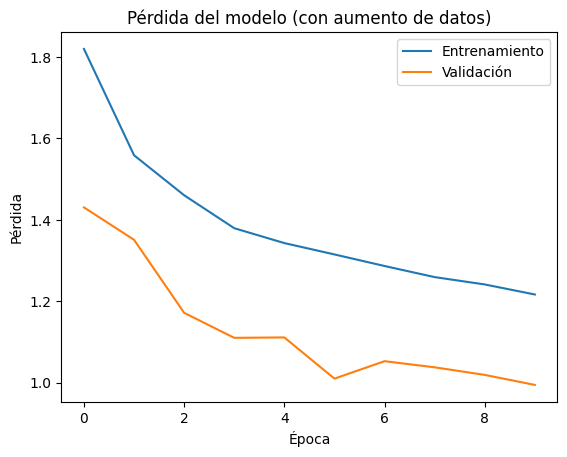

In [25]:
import matplotlib.pyplot as plt

# Precisión
plt.plot(history_aug.history['accuracy'], label='Entrenamiento')
plt.plot(history_aug.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo (con aumento de datos)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Pérdida
plt.plot(history_aug.history['loss'], label='Entrenamiento')
plt.plot(history_aug.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo (con aumento de datos)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

Guardar modelo mejorado

In [26]:
model.save('modelo_cifar10_cnn_mejorado.h5')
print("✅ Modelo mejorado guardado exitosamente.")

✅ Modelo mejorado guardado exitosamente.


Las gráficas muestran que el modelo mejora su rendimiento al aplicar aumento de datos. La precisión en validación alcanza valores superiores al 68%, mientras que la precisión de entrenamiento sube gradualmente, lo que indica que el modelo generaliza mejor gracias al data augmentation. Por otro lado, la pérdida en validación desciende rápidamente y se mantiene baja, con ligeras fluctuaciones normales en validación, lo cual es señal de buen comportamiento del modelo sin sobreajuste evidente. El gap entre entrenamiento y validación también sugiere que el modelo no memoriza los datos, sino que logra abstraer patrones útiles.